In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy.optimize import curve_fit 
import glob

In [12]:
# Gets the data into an array
path = '/Users/ascovera/Desktop/lsa-ast361/Work/ascovera/8lab/galaxy-rotation-curve/galaxyData/'
galaxy_data = glob.glob(path + "galpos*")
galaxy_data.sort()

calib = glob.glob(path + "calib*")
calib.sort()

In [13]:
# Gets the Spectra of Galaxy 
spec = []
for file in galaxy_data: 
    with open(file) as data:
        spec_rows = []
        for j, row in enumerate(data, start=1):
            if j%4 == 0:
                spec_rows.append(row)
        tot_spec = np.zeros(1024) 
        for row in spec_rows:
            t_spec = row.split(' ') 
            gal_spec = []
            for val in t_spec:
                if val != '' and val != '\n': 
                    gal_spec.append(val)
            tot_spec = (tot_spec + np.float64(gal_spec))/len(spec_rows)
        spec.append(tot_spec)
                                                             
# Gets the Spectra of Calibration
spec_c = []
for file_c in calib:
    with open(file_c) as data_c: 
        spec_rows_c = []
        for j, row_c in enumerate(data_c, start=1): 
            if j%4 == 0:
                spec_rows_c.append(row_c)
        tot_spec_c = np.zeros(1024)
        for row_c in spec_rows_c: 
            t_spec_c = row_c.split(' ') 
            calib_spec = []
            for val_c in t_spec_c:
                if val_c != '' and val_c != '\n':
                    calib_spec.append(val_c)
            tot_spec_c = (tot_spec_c + np.float64(calib_spec))/len(spec_rows_c)
        spec_c.append(tot_spec_c)

In [14]:
# sets up the frequency axis 
freq = []
sf = 1416 # start frequency
bw = 0.009766 # bandwidth
nc = 1024 # number of channels

for i in range(0,nc): 
    freq.append(sf+(i*bw))

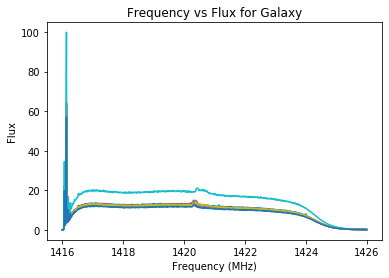

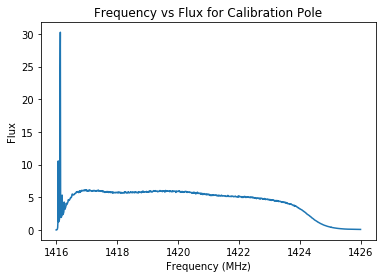

In [16]:
# Plots one of the flux and frequency for galaxy data 
for flux in spec:
    plt.plot(freq,flux)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Galaxy")
plt.show()


# Plots the calibration Frame
plt.plot(freq, spec_c[0])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Calibration Pole")
plt.show()

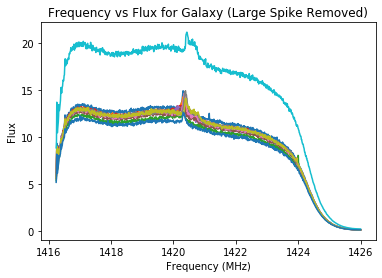

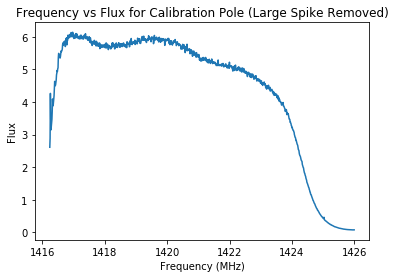

In [17]:
# Plots one of the flux and frequency for galaxy data (removing the la rge Spike at the beginning)
for flux in spec:
    plt.plot(freq[25:],flux[25:])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Galaxy (Large Spike Removed)")
plt.show()
# Plots the calibration Frame (removing the large Spike at the beginning)
plt.plot(freq[25:], spec_c[0][25:])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Frequency vs Flux for Calibration Pole (Large Spike Removed)")
plt.show()

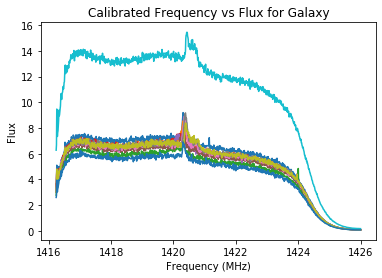

In [18]:
# Now we subtract the calibratin spectrum from all the galaxy data 
cal_spec = []
for i in range(0,len(spec)): 
    cal_spec.append(spec[i] - spec_c[0])
for cal_flux in cal_spec: 
    plt.plot(freq[25:],cal_flux[25:])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy")
plt.show()

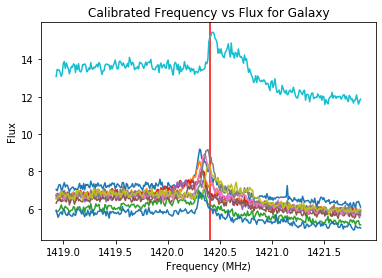

In [19]:
# Zooming in near the H I 21 cm emission line
actual_freq = 1420.405752
plt.axvline(actual_freq,color='r') 
for cal_flux in cal_spec:
    plt.plot(freq[300:600],cal_flux[300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy")
plt.show()

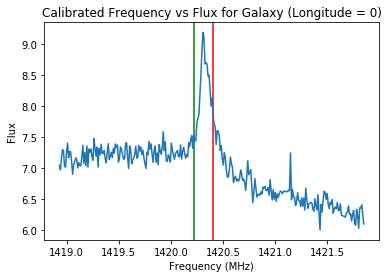

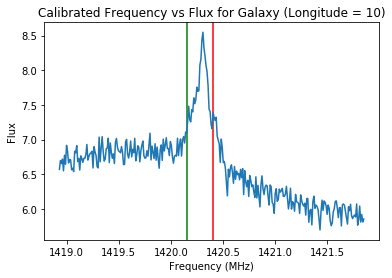

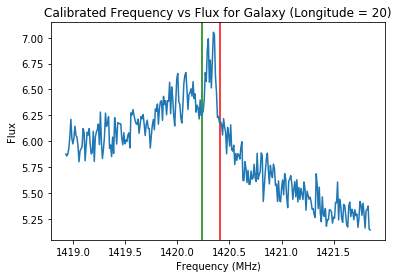

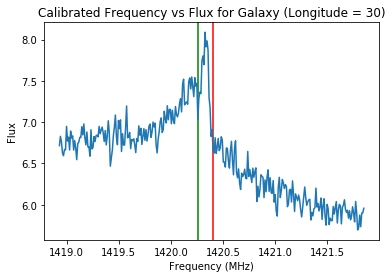

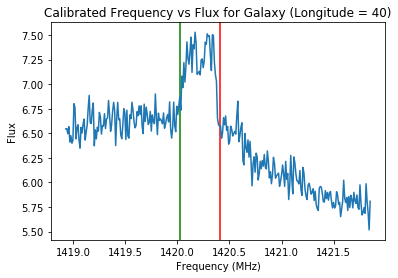

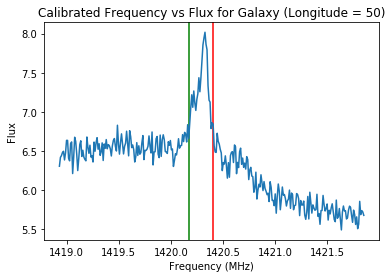

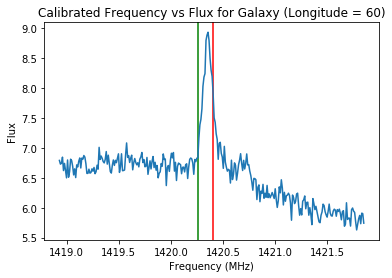

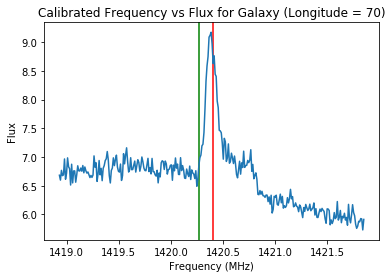

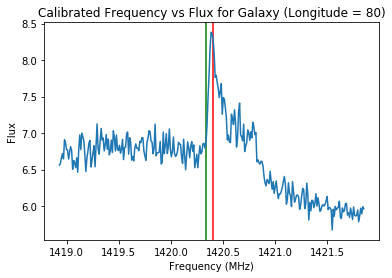

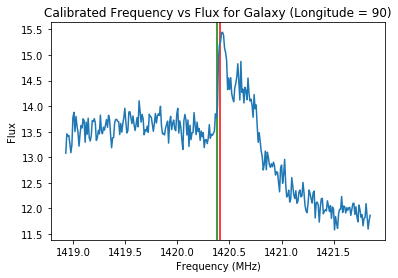

Red line shows the actual frequency of the 21cm line and the green shpws the estimate of where it was actually observed.


In [23]:
# Determining the lowest frequency where the 21 cm emission line is significant

# Red line shows the actual frequency of the 21cm line and the green shpws the 
# estimate of where it was actually observed.

longitude = [0,10,20,30,40,50,60,70,80,90]
HI_obs = np.zeros(10)

HI_obs[0] = (1420.22)
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[0],color='g')
plt.plot(freq[300:600],cal_spec[0][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 0)")
plt.show()

HI_obs[1] = 1420.15
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[1],color='g')
plt.plot(freq[300:600],cal_spec[1][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 10)")
plt.show()

HI_obs[2] = 1420.24
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[2],color='g')
plt.plot(freq[300:600],cal_spec[2][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 20)")
plt.show()

HI_obs[3] = 1420.26
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[3],color='g')
plt.plot(freq[300:600],cal_spec[3][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 30)")
plt.show()

HI_obs[4] = 1420.03
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[4],color='g')
plt.plot(freq[300:600],cal_spec[4][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 40)")
plt.show()

HI_obs[5] = 1420.17
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[5],color='g')
plt.plot(freq[300:600],cal_spec[5][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 50)")
plt.show()

HI_obs[6] = 1420.26
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[6],color='g')
plt.plot(freq[300:600],cal_spec[6][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 60)")
plt.show()

HI_obs[7] = 1420.27
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[7],color='g')
plt.plot(freq[300:600],cal_spec[7][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 70)")
plt.show()

HI_obs[8] = 1420.34
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[8],color='g')
plt.plot(freq[300:600],cal_spec[8][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 80)")
plt.show()

HI_obs[9] = 1420.38
plt.axvline(actual_freq,color='r')
plt.axvline(HI_obs[9],color='g')
plt.plot(freq[300:600],cal_spec[9][300:600])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Flux")
plt.title("Calibrated Frequency vs Flux for Galaxy (Longitude = 90)")
plt.show()

In [21]:
# Calculating the Relative Velocities
relative_vel = [] 
for obs in HI_obs:
    relative_vel.append((3*10**5)*(1-(obs/actual_freq))) # km/s
    
sun_vel = 255 # km/s
lsr = [10.48, 9.86, 8.96, 7.77, 6.33, 4.70, 2.93, 1.07, -0.82, -2.68] 
actual_vel = []
for i in range(0,len(relative_vel)):
    actual_vel.append(relative_vel[i] - lsr[i] + (sun_vel * np.sin(2*np.pi*longitude[i]/360)))

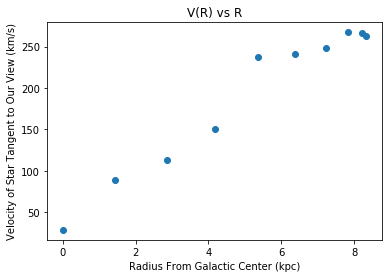

In [22]:
r_0 = 8.34 # kpc
r = np.zeros(10)
for i in range(0,len(r)):
    r[i] = r_0 * np.sin(2*np.pi*longitude[i]/360)
plt.scatter(r,actual_vel)
plt.xlabel("Radius From Galactic Center (kpc)")
plt.ylabel("Velocity of Star Tangent to Our View (km/s)")
plt.title("V(R) vs R")
plt.show()